In [1]:
import numpy as np
import torch 
from d2l import torch as d2l
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
eta = 0.4
def f_2d(x1, x2):
    return 0.1*x1**2 + 2*x2**2
def gd_2d(x1, x2, s1, s2):
    return (x1 - 0.2*eta*x1, x2 - 4*eta*x2, 0, 0)

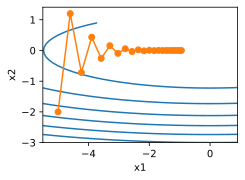

In [4]:
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

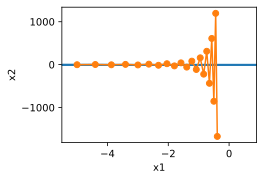

In [5]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

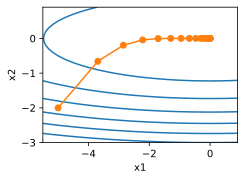

In [7]:
def rmsprop_2d(x1, x2, s1, s2):
    g1 = (0.2*x1)
    g2 = (4.0*x2)
    s1 = gamma*s1 + (1 - gamma)*g1**2
    s2 = gamma*s2 + (1 - gamma)*g2**2
    
    return (x1 - eta/(math.sqrt(s1 + 0.01))*g1, x2 - eta/(math.sqrt(s2 + 0.01))*g2, s1, s2)
eta, gamma = 0.6, 0.8
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

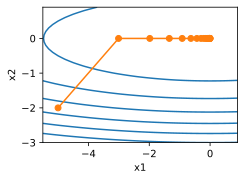

In [10]:
def adagrad_2d(x1, x2, s1, s2):
    g1 = (0.2*x1)
    g2 = (4.0*x2)
    s1 = s1 + g1**2
    s2 = s2 + g2**2
    
    return (x1 - eta/(math.sqrt(s1 + 0.01))*g1, x2 - eta/(math.sqrt(s2 + 0.01))*g2, s1, s2)
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [18]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    delta_x = torch.zeros((feature_dim, 1))
    
    
    return s_w, s_b
    
def adagrad(params, states, hyperparams):
    for p, s in zip(params, states):
        with torch.no_grad():
            g = p.grad
            s[:] = s + g**2
            p[:] -= hyperparams['lr']/torch.sqrt(s + eps) * g
        p.grad.data.zero_()

loss: 0.243, 0.015 sec/epoch


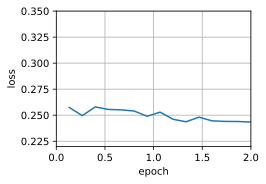

In [19]:
def train_adagrad(lr, num_epochs=2):
    d2l.train_ch11(adagrad, init_adagrad_states(feature_dim), {
        'lr': lr}, data_iter, feature_dim, num_epochs)
eps = 0.001
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_adagrad(0.2)